# ECON 323 Final Project

## Imports 

In [68]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Introduction <a name="in"></a>
<hr>

In this project, I will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, I will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns might be used as predictors.

<br><br>

## Understanding the each variable <a name="1"></a>
<hr>
I will first find the documentation of each variable in the dataset. Then, I will download the dataset using URL.

The following is the documentation for each feature in the dataset.

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)


The following code reads data from my GitHub. I downloaded the dataset from Kaggle and uploaded it to my GitHub, so that I can read it using URL.

In [69]:
df = pd.read_csv("https://raw.github.ubc.ca/mading11/d/master/UCI_Credit_Card.csv?token=AAAARSV4TU6OSI4E7WNKKXLCMIOAQ", encoding="utf-8")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<br><br>

## Data splitting <a name="2"></a>
<hr>
The following code splits the data into train and test portions. 

In [70]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


## Exploratory data analysis <a name="3"></a>
<hr>
The following code performs exploratory data analysis on the train set.

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

The the table shows that dateset contains no missing/NA values and it also shows the data type of each variable. It seems all the feature we have are numerical feature. This indicates that it might be a good idea to apply regression model on this dataset.

In [72]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


The table shows the basic statics for each variable and it help me to understand the scale of each variable. According to the plot, PAY, age, and BILL_AMT are in different scales. Thus I will preform data preprocessing using column transfer.

In [73]:
numeric_features = [
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "LIMIT_BAL",
    "EDUCATION",
    "MARRIAGE",
]

The following code plots graph of each feature.

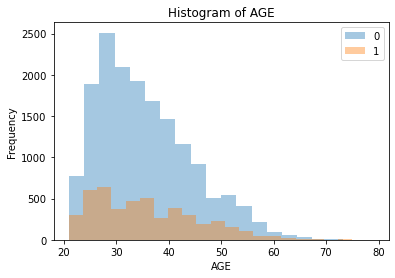

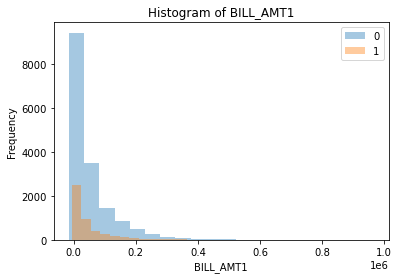

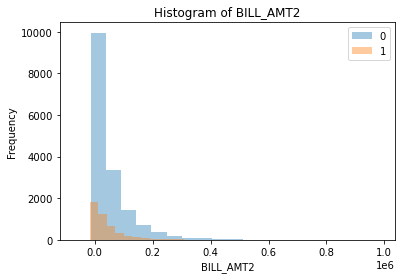

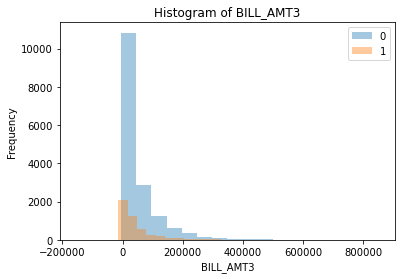

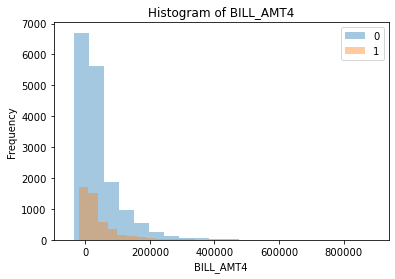

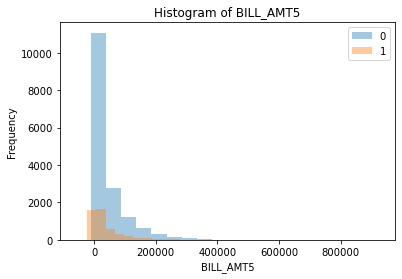

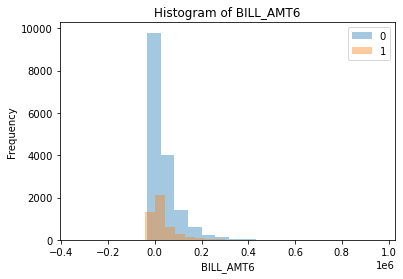

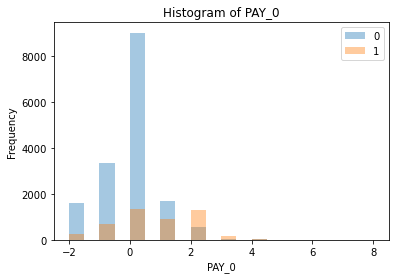

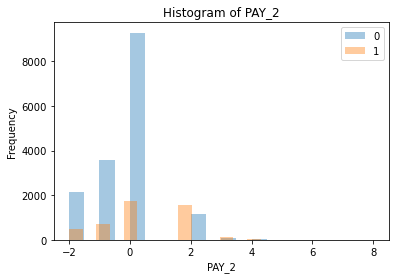

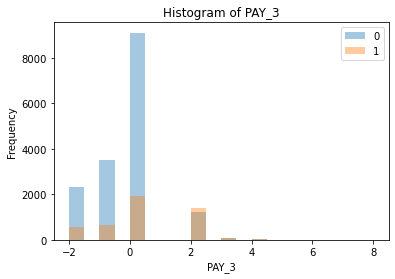

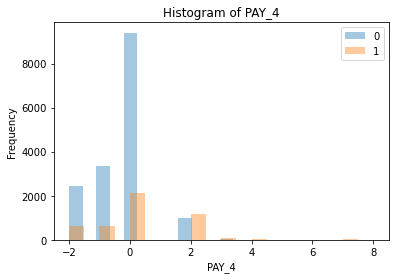

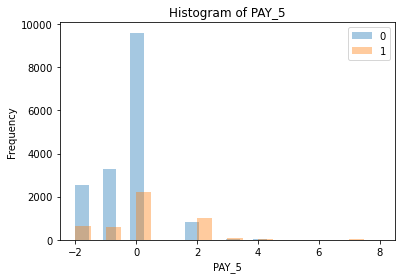

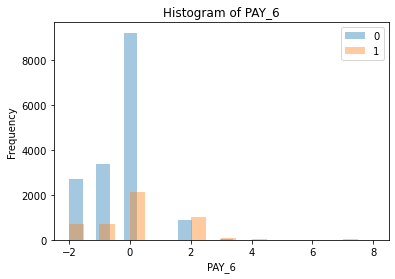

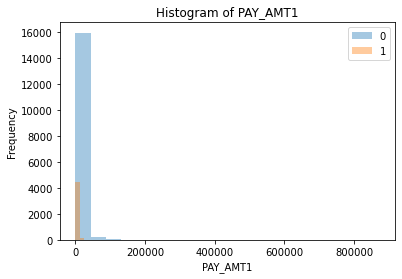

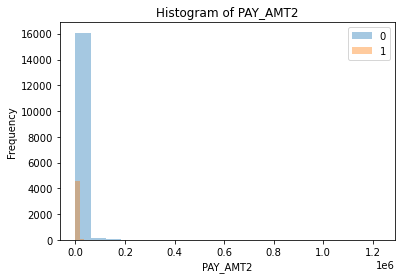

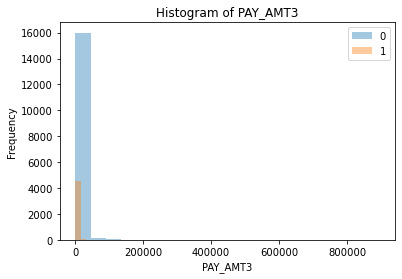

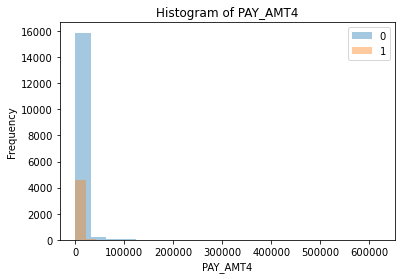

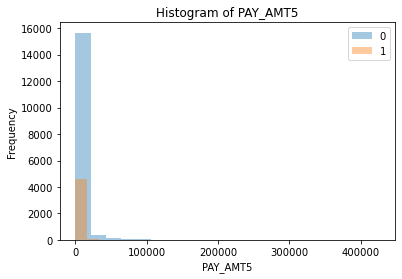

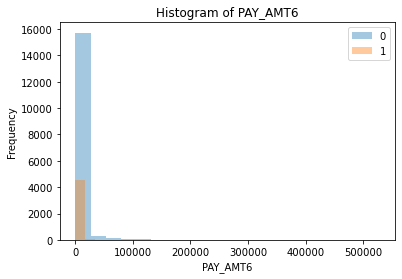

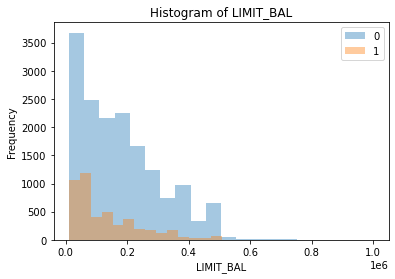

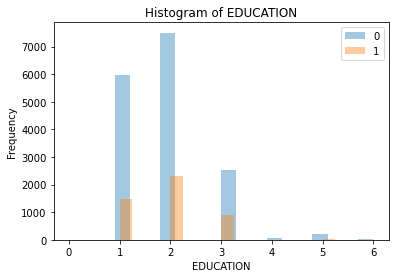

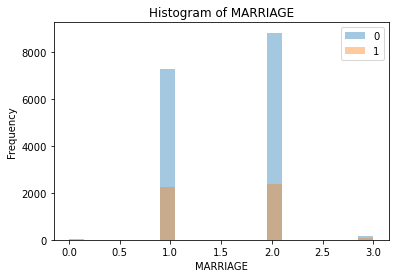

In [74]:
for feat in numeric_features:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(bins=20, alpha=0.4, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()

The plots show the AGE, BILL_AMT1 - BILL_AMT6, PAY_0 - PAY_6, PAY_AMT0 - PAY_AMT6, and LIMIT_BAL seems relevant to the given prediction task. That is because in the plots mentioned, the two different classes of target variable have relatively different center. I can thus put a threshold on these features to make my prediction. For instance, for PAY_6, I can put a threshold at 0.2, all customer who have PAY_6 greater than 0.2 are more likely to have default payment for the next month, and vise-versa.

Summarize of my initial observations about the data:
The data is tidy, contains no missing data/NA. All of its variables are numerical variables. This implies we can use model such as logistic linear regression, or tree based model like lgbm and random forest to preform prediction. Also, according to the visualization, I will like to use AGE, BILL_AMT1 - BILL_AMT6, PAY_0 - PAY_6, PAY_AMT0 - PAY_AMT6, and LIMIT_BAL as my predictors.

For this project, I want to use precision as my accuracy metric. That is because we want to minimize the situation that our model predicted a customer will pay the bill and that person ends up not. That mean we want a high ratio of true positive among all positive predictions.

<br><br>

## Preprocessing and transformations <a name="5"></a>
<hr>

I will preform StandardScaler on AGE, BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT3, and LIMIT_BAL. I will do nothing to EDUCATION since it is already a ordinary variable. I will also leave MARRIAGE and PAY_0 - PAY_6 as it is since these two are all categorical variable that has been converted into numerical datatype. I will drop all features that is not relevant to task(such as ID).

In [75]:
numeric_features = [
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "LIMIT_BAL",
]

passthrough_feats = ["MARRIAGE", "EDUCATION"]

drop_features = ["ID", "SEX"]

target = "default.payment.next.month"

The following code further splits training and testing set.

In [76]:
X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]

In [77]:
numeric_transformer = make_pipeline(StandardScaler())

ColumnTransformer = make_column_transformer(
    (numeric_transformer, numeric_features),
    ("passthrough", passthrough_feats),
    ("drop", drop_features),
)

In [78]:
ColumnTransformer

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'LIMIT_BAL']),
                                ('passthrough', 'passthrough',
                                 ['MARRIAGE', 'EDUCATION']),
                                ('drop', 'drop', ['ID', 'SEX'])])

<br><br>

## Baseline model <a name="6"></a>
<hr>

In this section, a simple baseline model will be built and compared with other advanced model. For this project I will use dummy classifier, which is a standard baseline model that only predict the majority class of the target variable.

In [79]:
dummy = DummyClassifier(strategy="prior")
pd.DataFrame(cross_validate(dummy, X_train, y_train, scoring = "precision", return_train_score=True)).mean()

fit_time       0.006332
score_time     0.003721
test_score     0.000000
train_score    0.000000
dtype: float64

In [80]:
pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score=True)).mean()

fit_time       0.007769
score_time     0.001054
test_score     0.776762
train_score    0.776762
dtype: float64

In [81]:
train_df["default.payment.next.month"].value_counts(normalize=True)

0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64

DummyClassifier gives the accuracy of 78%. This simply means the majority class takes about 78% of the target variable. In this case about 78% of default.payment.next.month is 0. However, it also gives a precision score of 0. That is because the majority class is 0 in the given dataset and dummy classifier is predicting 0 only, which make TP and FP equal to zero(model is treating 1 as true). This will case precision to be equal to zero at all time, because precision equals to TP/(TP + FP).

<br><br>

## Basic logistic regression model <a name="7"></a>
<hr>

In this part I will try logistic regression as my second model. To optimize my model, I decide to do a crossvalidation.

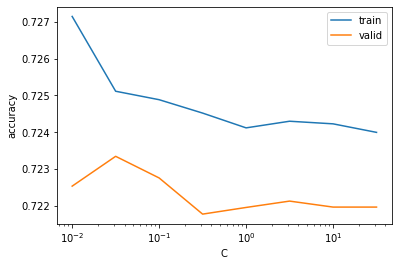

In [82]:
train_scores = []
cv_scores = []
train_sd = []
cv_sd = []

C_vals = 10.0 ** np.arange(-2, 2, 0.5)

for C in C_vals:
    pipe = Pipeline(
        [
            ("ColumnTransformer", ColumnTransformer),
            ("logreg", LogisticRegression(max_iter=1000, C=C)),
        ]
    )
    cv_results = cross_validate(pipe, X_train, y_train, scoring="precision",return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())
    train_sd.append(cv_results["train_score"].std())
    cv_sd.append(cv_results["test_score"].std())
    

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [83]:
pd.DataFrame({"C": C_vals, "train": train_scores, "valid": cv_scores, "train_sd": train_sd, "cv_sd": cv_sd}).sort_values(
    by="valid", ascending=False
)

,C,train,valid,train_sd,cv_sd
1,0.031623,0.725110,0.723340,0.005511,0.016735
2,0.100000,0.724880,0.722752,0.004585,0.017060
0,0.010000,0.727144,0.722529,0.003806,0.020289
5,3.162278,0.724294,0.722123,0.004950,0.016589
6,10.000000,0.724223,0.721960,0.005029,0.016348
7,31.622777,0.723991,0.721960,0.004891,0.016348
4,1.000000,0.724114,0.721950,0.005179,0.016667
3,0.316228,0.724516,0.721769,0.005216,0.016848


logistic regression preforms the best when C is set to 0.031623. The best validation precision score is 0.723340 with standard deviation of 0.016735. Train score and validate score are relatively close, which means the model is neither overfitting nor underfitting. However, the validate score precision is not very high, which means we may need to check out other models.

I want to try Ridge model to see if all linear regression model preforms better on this dataset.

In [84]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

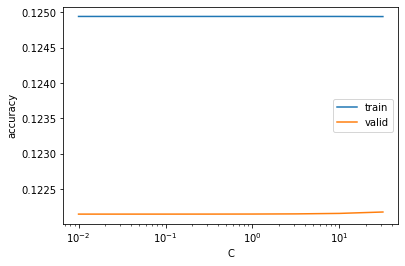

In [85]:
train_scores = []
cv_scores = []
train_sd = []
cv_sd = []

Alpha = 10.0 ** np.arange(-2, 2, 0.5)

for A in Alpha:
    pipe = Pipeline(
        [
            ("ColumnTransformer", ColumnTransformer),
            ("rifge", Ridge(alpha=A)),
        ]
    )
    cv_results = cross_validate(pipe, X_train, y_train,return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())
    train_sd.append(cv_results["train_score"].std())
    cv_sd.append(cv_results["test_score"].std())
    

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [86]:
pd.DataFrame({"C": C_vals, "train": train_scores, "valid": cv_scores, "train_sd": train_sd, "cv_sd": cv_sd}).sort_values(
    by="valid", ascending=False
)

,C,train,valid,train_sd,cv_sd
7,31.622777,0.124939,0.122176,0.002469,0.010005
6,10.000000,0.124941,0.122156,0.002469,0.010041
5,3.162278,0.124941,0.122149,0.002469,0.010053
4,1.000000,0.124941,0.122147,0.002469,0.010057
3,0.316228,0.124941,0.122146,0.002469,0.010058
2,0.100000,0.124941,0.122146,0.002469,0.010058
1,0.031623,0.124941,0.122146,0.002469,0.010059
0,0.010000,0.124941,0.122146,0.002469,0.010059


In [87]:
train_scores = []
cv_scores = []
train_sd = []
cv_sd = []

Alpha = 10.0 ** np.arange(-2, 2, 0.5)

for A in Alpha:
    pipe = Pipeline(
        [
            ("ColumnTransformer", ColumnTransformer),
            ("rifge", Ridge(alpha=A)),
        ]
    )
    cv_results = cross_validate(pipe, X_train, y_train, scoring="precision", return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())
    train_sd.append(cv_results["train_score"].std())
    cv_sd.append(cv_results["test_score"].std())
    
pd.DataFrame({"alpha": Alpha, "train": train_scores, "valid": cv_scores, "train_sd": train_sd, "cv_sd": cv_sd}).sort_values(
    by="valid", ascending=False
)

,alpha,train,valid,train_sd,cv_sd
0,0.010000,NaN,NaN,NaN,NaN
1,0.031623,NaN,NaN,NaN,NaN
2,0.100000,NaN,NaN,NaN,NaN
3,0.316228,NaN,NaN,NaN,NaN
4,1.000000,NaN,NaN,NaN,NaN
5,3.162278,NaN,NaN,NaN,NaN
6,10.000000,NaN,NaN,NaN,NaN
7,31.622777,NaN,NaN,NaN,NaN


Seems Ridge model is not applicable with precision metrics. And even if I set scoring equal to accuracy, Ridge still preforms poorly. This might because that Ridge model is linear regression model, so it will now working will on predicting binary target.

<br><br>

## Other different models <a name="8"></a>
<hr>

I will now try several other models to see if they can do better. I would like to try random forest model and decision tree. Since random forest model and decision tree model can be applied on both regression and classification scenario, I expect it to preform well on this dataset. For now, I will use the default value for the new models, and preform hyperparameter optimizing later on.

In [20]:
from sklearn.tree import DecisionTreeClassifier
pipe_lr = make_pipeline(
    ColumnTransformer, LogisticRegression(max_iter=2000, random_state=123, C=0.031623)
)
pipe_dt = make_pipeline(ColumnTransformer, DecisionTreeClassifier(random_state=123))
pipe_rf = make_pipeline(ColumnTransformer, RandomForestClassifier(random_state=123))
classifiers = {
    "logistic regression": pipe_lr,
    "decision tree": pipe_dt,
    "random forest": pipe_rf,
}

In [88]:
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [22]:
results = {}

In [23]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):

    scores = cross_validate(model, X_train, y_train, scoring="precision", **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [24]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True
    )

In [25]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
logistic regression,0.148 (+/- 0.009),0.013 (+/- 0.001),0.723 (+/- 0.019),0.725 (+/- 0.006)
decision tree,0.718 (+/- 0.117),0.017 (+/- 0.005),0.392 (+/- 0.018),1.000 (+/- 0.000)
random forest,8.542 (+/- 0.512),0.214 (+/- 0.059),0.649 (+/- 0.020),0.999 (+/- 0.000)


Seems none of the model beat logistic regression in terms of validate precision score. And all models except logistic regression seems overfitted. However, logistic regression is using optimized hyperparameter and the rest model are just using default setting. That the result might e change after preforming hyperparameter optimization on the rest of models. However, considering the test score for decision tree is way too low, I would only carry Random Forest model on in the following project.

<br><br>

## Feature selection <a name="9"></a>
<hr>

I will try to select relevant features only use "RFECV", this is a method I learn from my CPSC 330. The main purpose for this is to eliminate the features that is not closely relevant to the target variable to increase the accuracy.

In [26]:
X_train_scaled = ColumnTransformer.fit_transform(X_train)

In [27]:
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

array([11,  1,  7,  1, 17, 14,  8,  1,  1, 12, 16,  5, 18,  1,  2,  6,  4,
       15, 13, 10,  3,  9])

In [28]:
from sklearn.feature_selection import RFECV

rfe_cv = RFECV(RandomForestClassifier(random_state=123), cv=5)
rfe_cv.fit(X_train_scaled, y_train)
print(rfe_cv.support_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [31]:
rf_pipe_selected = make_pipeline(
    StandardScaler(),
    RFECV(RandomForestClassifier(random_state=123), cv=5),
    RandomForestClassifier(random_state=42),
)

pd.DataFrame(cross_validate(rf_pipe_selected, X_train_scaled, y_train, scoring="precision", return_train_score=True, error_score='raise')).mean()

fit_time       747.939653
score_time       0.186265
test_score       0.650569
train_score      0.997165
dtype: float64

In [32]:
lg_pipe_selected = make_pipeline(
    StandardScaler(),
    RFECV(LogisticRegression(max_iter=1000), cv=5),
    LogisticRegression(random_state=42, C = 0.031623),
)

pd.DataFrame(cross_validate(lg_pipe_selected, X_train_scaled, y_train, scoring="precision", return_train_score=True)).mean()

fit_time       7.489239
score_time     0.005159
test_score     0.700383
train_score    0.699941
dtype: float64

The result is quite interesting as the precision score for Random Forrest remain the same and precision score for logistic regression decreased. This is reasonable since RFECV thinks all features are important to random forest, the test score after feature selecting will remain the same.(It is slightly different because the random state is set differently.) The fact that precision score for logistic regression is decreased might be cause by the algorithm accidentally removed feature that is only meaningful together with another feature.

## Hyperparameter optimization <a name="10"></a>
<hr>

In this part,I will use RandomizedSearchCV to optimize the hyperparameter of Random forest model using the training dataset after feature selection. The following is a reference of technic I used.   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [33]:
drop_features_selected = []

In [34]:
numeric_transformer = make_pipeline(StandardScaler())

ColumnTransformer_selected = make_column_transformer(
    (numeric_transformer, numeric_features),
    ("passthrough", drop_features_selected),
    ("drop", drop_features_selected),
)

In [35]:
ColumnTransformer_selected

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                  'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'LIMIT_BAL']),
                                ('passthrough', 'passthrough', []),
                                ('drop', 'drop', [])])

In [36]:
# part of the code inspired by https://stackoverflow.com/questions/56685352/lightgbm-hyperparameter-tuning-randomimzedsearchcv
from scipy.stats import loguniform
param_grid = {
    "n_estimators": np.arange(1, 100, 1),
    "max_depth": np.arange(1, 100, 1),
}

X_train_trans = ColumnTransformer_selected.fit_transform(X_train)

random_search = RandomizedSearchCV(
   RandomForestClassifier() , param_distributions=param_grid, scoring="precision", cv = 5)

random_search.fit(X_train_trans, y_train);


In [37]:
random_search.best_score_

0.6864445140974531

In [38]:
random_search.best_params_

{'n_estimators': 7, 'max_depth': 4}

Summary:
By setting hyperparameters to 'n_estimators': 7, 'max_depth': 4, the Random forest will have optimal performance and the accuracy is increased from 0.649 to 0.6864445140974531

Since the precision score for lightGBM after hyperparameter optimizing and feature selecting is still lower than logistic regression. I will pick logistic regression model as my final model for the rest of project. Also, since the precision score deceased after feature selecting for logistic regression, I will not use selected feature for the reset of project.

<br><br>

## Interpretation and feature importances <a name="1"></a>
<hr>

In this part I will use eli5 I leaned from CPSC 330 to explain the feature importance of one of the best performing model.

In [39]:
import eli5

In [40]:
feature_names = (
    numeric_features +
    passthrough_feats
)
feature_names[:25]

['AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'LIMIT_BAL',
 'MARRIAGE',
 'EDUCATION']

In [44]:
pipe_lgbm = make_pipeline(ColumnTransformer, LogisticRegression(max_iter=2000, random_state=123, C=0.031623))
pipe_lgbm.fit(X_train, y_train)
eli5.show_weights(
    pipe_lgbm.named_steps["logisticregression"], feature_names=feature_names
)

PAY_0 for some reasons dominates other variables with a maximal weight of PAY_0. That is to say, the prediction result will highly depends on PAY_0. The rest of variable all have relatively same and small weight. According to the table, the decision is mainly made based on variable PAY_0. This might suggest the banks to pay more attantion to the repayment status  first month

<br><br>

## Results on the test set <a name="12"></a>
<hr>

In this part I will test my model on testing set.

In [42]:
from sklearn.metrics import precision_score
lr_opt = LogisticRegression(max_iter=2000, random_state=123, C=0.031623)
pipe_opt = make_pipeline(ColumnTransformer, lr_opt)
pipe_opt.fit(X_train, y_train)
y_pred = pipe_opt.predict(X_test)
precision_score(y_test, y_pred)

0.7011834319526628

The test score is slightly lower compare to validation score from before(0.723 vs 0.701). I generally trust my test result because it matches with the validation score. My only concern is, based on the eli5 weight table, variable PAY_0 dominates all variables, which seems not making a lot of sense. Even though, PAY_0 stands for the repayment status for the last month before targeting month, which might be the reason why it has the highest weight, I still think it would be more reasonable to make prediction based on the long time period behavior of customer. That's why I would expect PAY_0 - PAY_6 to have similar weight in terms of predicting. Because of the unusual weight of variable I can not say my model is perfect. 

<br><br>

## Summary of results <a name="13"></a>
<hr>


1. The final precision score obtained by the optimized logistic regression model is 0.701.
2. This means among all the positive predictions made by the logistic regression model there will be about 70% of them are predicted correctly. In this scenario, if 100 customers are predicted to have default payment next month, about 30 customers will not have default payment next month. I think the model is generally doing OK but can definitely do better. An precision of 70% is obviously too low for a bank like TD or ICBC in real life as bank would want to be as precision as possible in terms of predicting weather or not the costumer will have default payment next month or not to adjust how they would treat each costumer.
3. Things I did not try that could potentially improve the performance:
Feature engineering.
Preform feature selection with different approach.
Try extra models such as XGBoost, CatBoost(I find those two models during searching, but they seems a bit complex so I decide not using them for this time), and e.t.c.

<br><br>

## Reference list <a name="13"></a>
<hr>

  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)
  - [eli5](https://eli5.readthedocs.io/en/latest/tutorials/xgboost-titanic.html#explaining-weights)
  - [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

<br><br><br><br>